# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [92]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.0


In [93]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [94]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [95]:
# Shape
df_dsa.shape

(9700, 11)

In [96]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [97]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [98]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [99]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [100]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [101]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [102]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [103]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [104]:
max_value = df_dsa[df_dsa['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum()
max_value.nlargest(1)

Cidade
New York City    68362.814
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

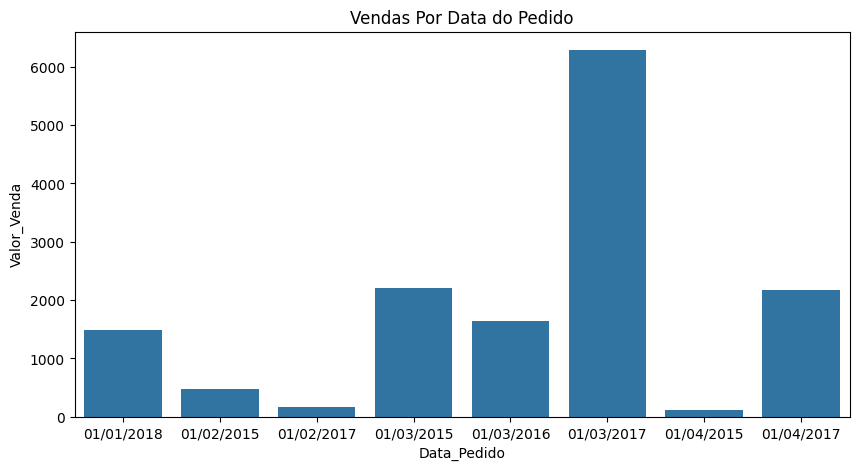

In [105]:
valores_datas = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()
# Apenas uma amostra
valores_datas = valores_datas.head(8)
fig = plt.figure(figsize = (10, 5))
sns.barplot(data = valores_datas, 
            y = 'Valor_Venda', 
            x = 'Data_Pedido').set(title = 'Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

C:\Users\Maciota\AppData\Local\Temp\ipykernel_4436\3306087589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_estados,
C:\Users\Maciota\AppData\Local\Temp\ipykernel_4436\3306087589.py:4: UserWarning: 
The palette list has fewer values (6) than needed (49) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=total_estados,


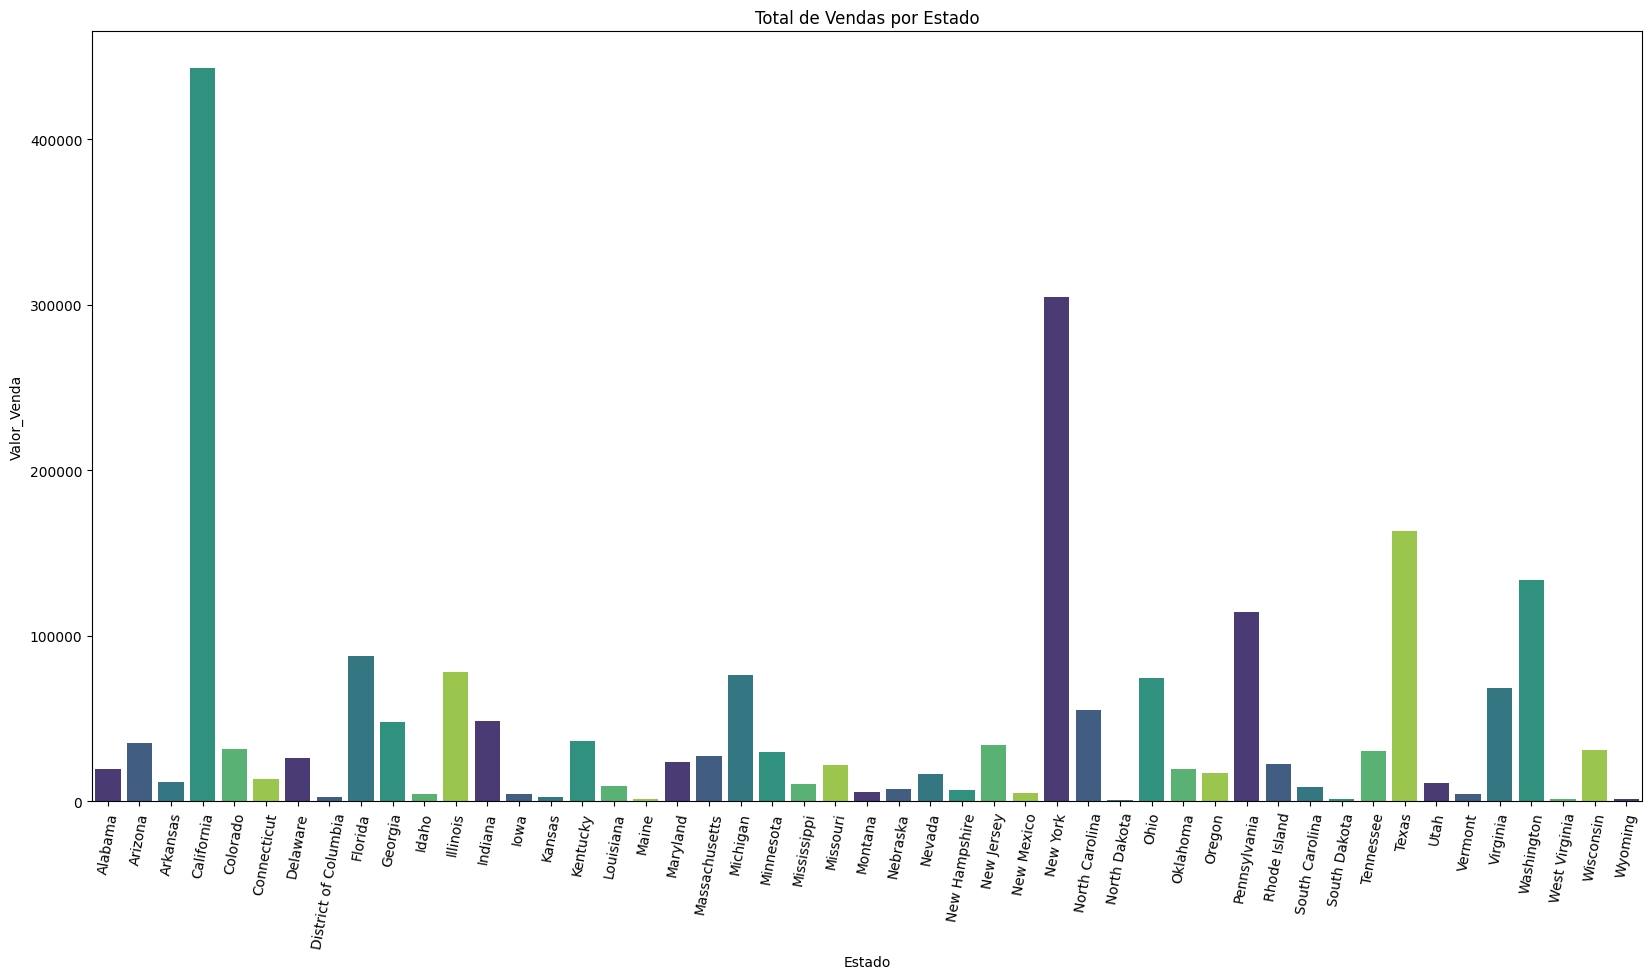

In [106]:
total_estados = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()
fig = plt.figure(figsize = (20, 10))
palette_color = sns.color_palette("viridis")
sns.barplot(data=total_estados,
            x='Estado',
            y='Valor_Venda',
            palette=palette_color).set(title="Total de Vendas por Estado")
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [107]:
df_dsa.groupby('Cidade')['Valor_Venda'].sum().nlargest(10)

Cidade
New York City    251749.2190
Los Angeles      171654.6330
Seattle          114725.4780
San Francisco    107489.9520
Philadelphia     107197.8030
Houston           61590.1868
San Diego         47458.3790
Chicago           46974.3430
Jacksonville      44713.1830
Detroit           42446.9440
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

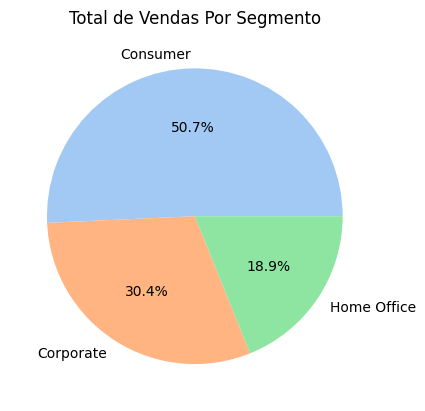

In [108]:
segmentos = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index()
palette_color = sns.color_palette('pastel')
plt.pie(data=segmentos,
        x='Valor_Venda',
        labels='Segmento',
        autopct='%1.1f%%',
        colors=palette_color)
plt.title('Total de Vendas Por Segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [109]:
df_dsa['Ano'] = df_dsa['Data_Pedido'].apply(lambda x: pd.Series(str(x).split('/')[2]))

In [110]:
df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum().reset_index()

,Ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229
5,2016,Home Office,74134.1332
6,2017,Consumer,288459.5572
7,2017,Corporate,203266.7398
8,2017,Home Office,103639.6270
9,2018,Consumer,323359.6019


## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [111]:
df_dsa[df_dsa['Valor_Venda'] > 1000].shape

(457, 12)

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [112]:
# Média Antes - Considerando todo DF
m_antes = df_dsa['Valor_Venda'].mean()
# Média Antes - Considerando apenas as colunas com Valor Venda maior que 1000
m_antes_des = df_dsa[df_dsa['Valor_Venda'] > 1000].Valor_Venda.mean()

print(f"A média de vendas antes do desconto é {m_antes.round(2)}")
print(f"A média de vendas antes do desconto para colunas com Valor Venda maior que 1k é {m_antes_des.round(2)}")

A média de vendas antes do desconto é 230.47
A média de vendas antes do desconto para colunas com Valor Venda maior que 1k é 2116.81


In [113]:
# Média Depois - Considerando todo DF
m_depois = df_dsa['Valor_Venda'].apply(lambda x: x-(x*15/100) if x > 1000 else x).mean()
# Média Depois - Considerando apenas as colunas com Valor Venda maior que 1000
m_depois_des = df_dsa[df_dsa['Valor_Venda'] > 1000].Valor_Venda.apply(lambda x: x-(x*15/100) if x > 1000 else x).mean()

print(f"A média de vendas depois do desconto é {m_depois.round(2)}")
print(f"A média de vendas depois do desconto para colunas com Valor Venda maior que 1k é {m_depois_des.round(2)}")

A média de vendas depois do desconto é 215.51
A média de vendas depois do desconto para colunas com Valor Venda maior que 1k é 1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [116]:
df_dsa['Mes'] = df_dsa['Data_Pedido'].apply(lambda x: pd.Series(str(x).split('/')[1]))

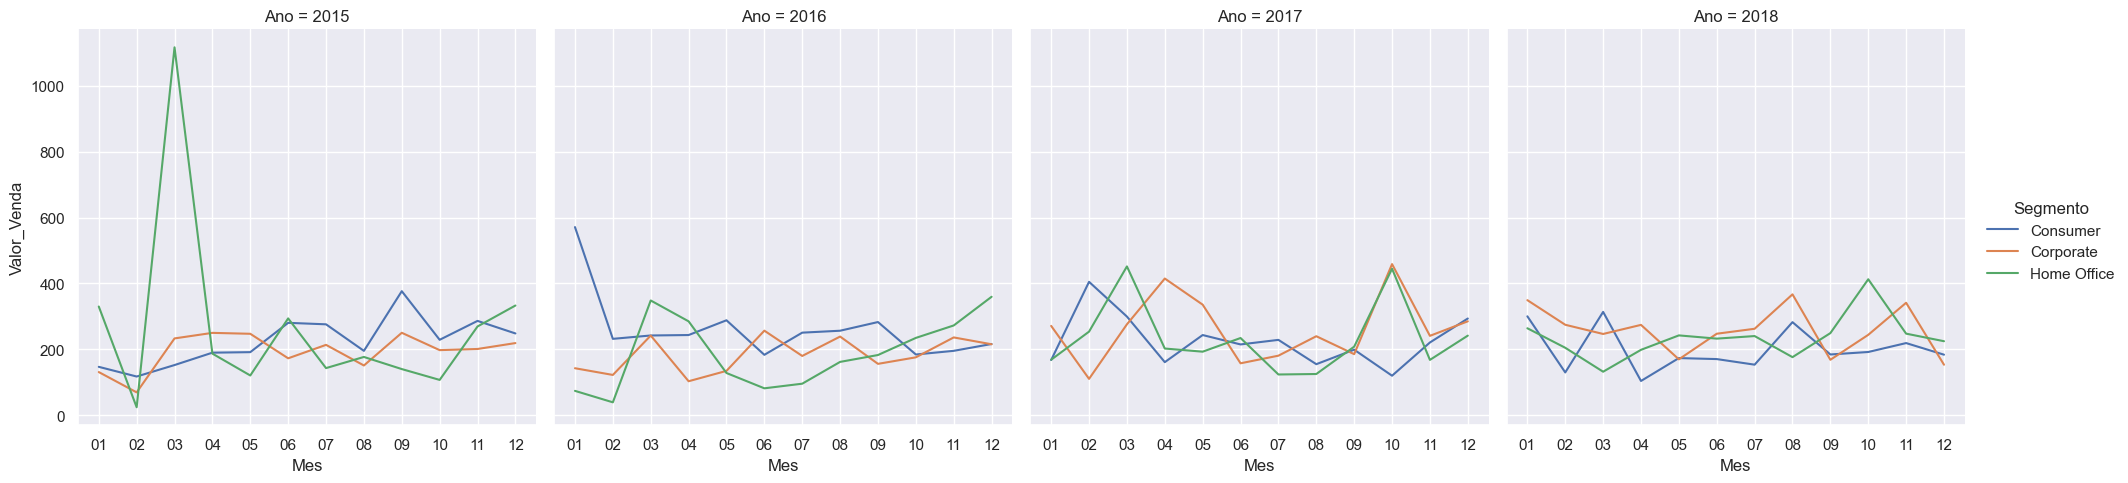

In [133]:
df_9 = df_dsa.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].mean().reset_index()
sns.set()
sns.relplot(
    kind="line",
    data=df_9,
    x="Mes",
    y="Valor_Venda",
    hue='Segmento',
    col="Ano"
)


## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

# Fim